# Titanic - Machine Learning from Disaster
# Importing Dataset

In [90]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [91]:
train_df = pd.read_csv("train.csv",index_col=0)
test_df = pd.read_csv("test.csv", index_col=0)

# EDA

In [92]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2.1 Firstly we will store the passenger ids for creating the submission file for kaggle 

In [93]:
passenger_ids = test_df.index
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [95]:
# statistical description of the data
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2.2 Finding top missing values in both train and test data

In [96]:
na_val = pd.DataFrame(train_df.isna().sum())
top_na = na_val.sort_values(by = 0 , ascending = False)[:3]
top_na[0] = (top_na[0])
top_na.rename(columns = {0:' NUmber of missing values in Train'})

,NUmber of missing values in Train
Cabin,687
Age,177
Embarked,2


In [97]:
na_val = pd.DataFrame(test_df.isna().sum())
top_na = na_val.sort_values(by = 0 , ascending = False)[:3]
top_na[0] = (top_na[0])
top_na.rename(columns = {0:'NUmber of missing values in Test'})

,NUmber of missing values in Test
Cabin,327
Age,86
Fare,1


2.2 We need to to impute the above columns effectively.

2.3 Let identify numeric and categorical data

In [98]:
numeric_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes('object').columns.tolist()

In [99]:
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [100]:
numeric_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

2.4 Upon looking at the data we foudn that the [ Pclass , Parch ] also belong to categorical. 

2.5 Investigating how Pclass affects the survival of a passenger

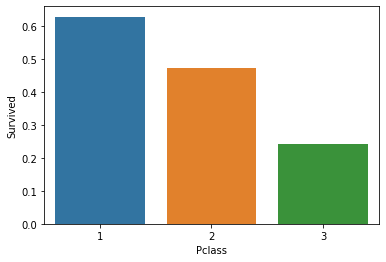

In [101]:
pclass_df = train_df.groupby(by='Pclass').mean().reset_index()
pclass_df.reset_index()
sns.barplot(data=pclass_df, x='Pclass', y='Survived')
plt.show()

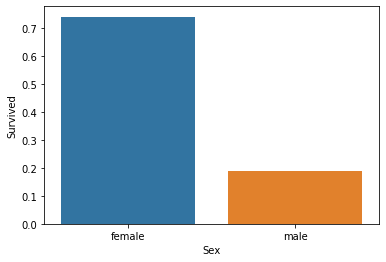

In [102]:
Sex_df = train_df.groupby(by='Sex').mean().reset_index()
Sex_df.reset_index()
sns.barplot(data=Sex_df, x='Sex', y='Survived')
plt.show()

2.6 Ingishts : It can be seen that Pclass 1 and female passengers have higher chance of surviving

2.7 Lets try to visualize how age affects the survival of a passenger. 
Since there are numeric values for age we will convert them to apporiate bins. This will help in visualizing the graph

In [103]:
# sort the ages into logical categories
bins = [0, 2, 12, 17, 60, 999]
labels = ['Infants', 'Child', 'Teen', 'Adult', 'Senior']
age_groups = pd.cut(train_df.Age, bins, labels = labels)
train_df['AgeGroup'] = age_groups

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult


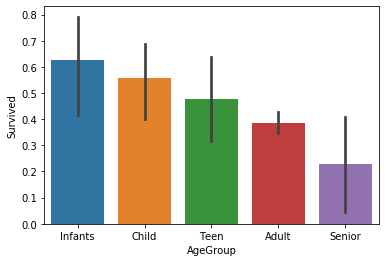

In [104]:
# draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train_df)
plt.show()

2.7.1 Insights: Infants and Child have higher rate of surviving. This is crucial 
    as , if a passenger in test data is a infant or child their likelyhood of surviving is greater

2.8 Lets try to visualize if passenger with cabin has survived or not in train data.
We will assign 1 if a passenger has a cabin and 0 if not.

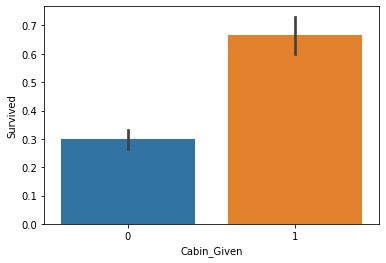

In [105]:
# make a new column to check if cabin is available to passenger
train_df["Cabin_Given"] = (train_df["Cabin"].notnull().astype('int'))
test_df["Cabin_Given"] = (test_df["Cabin"].notnull().astype('int'))

# plot how many with cabin survived
train_df[["Cabin_Given","Survived"]].groupby("Cabin_Given",as_index=False).mean()
sns.barplot(x="Cabin_Given",y="Survived",data=train_df)
plt.show()

2.8.1 Insights: Passenger with cabin have higher chance of surviving.

# Feature Engineering 

3.1 We will merge both the train and test data to feature engineering efficiently

In [106]:
merged_df = pd.concat([train_df, test_df], ignore_index=True)
merged_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0


3.2 Fill missing values

3.2.1
To Handle missing values we will performing the below operations:
<br>Fill missing values in Embarked with the mode of the column
<br>Fill missing values in Fare with the median of the column

In [107]:
merged_df['Embarked'].fillna(merged_df['Embarked'].mode()[0], inplace = True)
merged_df['Fare'].fillna(merged_df['Fare'].median(), inplace = True)

3.2.2
<br>To fill missing values in Age we will be using the title in the names to guess the age as simply 
imputing the age with mean or modes yields poor results on the accuracy score

In [108]:
# extract a title for each Name, and save it into new column
merged_df['Title'] = merged_df['Name'].str.extract(' ([A-Za-z]+)\.')
# inspect the titles
merged_df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

3.2.3 <br>Since there are multiple title we will only be using the most 
frequent titles to impute the age 

In [109]:
title_count = pd.DataFrame(merged_df['Title'].value_counts()).reset_index()
title_list = list(title_count['index'][:5])
title_list

['Mr', 'Miss', 'Mrs', 'Master', 'Rev']

3.2.4 We will assign "Other" to rest of the titles 

In [110]:
merged_df['Title'] = merged_df['Title'].apply(lambda x: x if x in title_list else 'Other')

In [111]:
merged_df['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Other      26
Rev         8
Name: Title, dtype: int64

In [112]:
merged_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given,Title
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,0,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,0,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,1,Mrs
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,0,Mr


3.3 Lets impute the Age using title

In [113]:
merged_df['Age'].isna().sum()

263

In [114]:
print("Number of Age values missing for each title ")
for title in title_list:
    print(title , merged_df.loc[merged_df['Title'] == title]['Age'].isna().sum())
print("Other" , merged_df.loc[merged_df['Title'] == "Other"]['Age'].isna().sum())

Number of Age values missing for each title 
Mr 176
Miss 50
Mrs 27
Master 8
Rev 0
Other 2


In [115]:
print("Median of Age values for each title ")
for title in title_list:    
    print(title , merged_df.loc[merged_df['Title'] == title]['Age'].median())
print("Other" , merged_df['Age'].median())

Median of Age values for each title 
Mr 29.0
Miss 22.0
Mrs 35.5
Master 4.0
Rev 41.5
Other 28.0


3.3.1 We will impute the missing values for age by using the above median for each title  

In [116]:
# fill missing age with median age group for each title
# calculate median age for different titles
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Mr'),'Age']= 29.0
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Miss'),'Age']= 22.0
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Mrs'),'Age']= 35.50
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Master'),'Age']= 4.0
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Rev'),'Age']= 41.5
merged_df.loc[(merged_df.Age.isnull())&(merged_df.Title=='Other'),'Age']= 28.0

In [117]:
merged_df['Age']

0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304    29.0
1305    39.0
1306    38.5
1307    29.0
1308     4.0
Name: Age, Length: 1309, dtype: float64

In [118]:
merged_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given,Title
1304,NaN,3,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,NaN,S,NaN,0,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,1,Other
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN,0,Mr
1307,NaN,3,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,NaN,S,NaN,0,Mr
1308,NaN,3,"Peter, Master. Michael J",male,4.0,1,1,2668,22.3583,NaN,C,NaN,0,Master


In [119]:
merged_df.isna().sum()

Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
AgeGroup        595
Cabin_Given       0
Title             0
dtype: int64

3.4 We will use LabelEncoding to encode the approporiate Categorical Features 

In [120]:
categorical_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [121]:
categorical_Features = ['Sex', 'Embarked', 'Title']
for feature in categorical_Features:
    label = LabelEncoder()
    merged_df[feature] = label.fit_transform(merged_df[feature])

In [122]:
merged_df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given,Title
1304,NaN,3,"Spector, Mr. Woolf",1,29.0,0,0,A.5. 3236,8.0500,NaN,2,NaN,0,2
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,PC 17758,108.9000,C105,0,NaN,1,4
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,2,NaN,0,2
1307,NaN,3,"Ware, Mr. Frederick",1,29.0,0,0,359309,8.0500,NaN,2,NaN,0,2
1308,NaN,3,"Peter, Master. Michael J",1,4.0,1,1,2668,22.3583,NaN,0,NaN,0,0


3.5 For Fare and Age columns we will be using equal frequency binning 
method taught in week 9 to bin the fare values and age values.
Than we will encode the bins using labelencoding. This step is done to 
effectively utilize the fare and age column rather than dropping them 

In [123]:
merged_df['Fare_Bin'] = pd.qcut(merged_df["Fare"], 5)
merged_df['Fare_Bin'].value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       256
(7.854, 10.5]        254
Name: Fare_Bin, dtype: int64

In [124]:
merged_df['Fare_Bin'] = pd.qcut(merged_df["Fare"], 5)
label = LabelEncoder()
merged_df["Fare_Bin"] = label.fit_transform(merged_df["Fare_Bin"])
merged_df["Fare_Bin"].value_counts()

0    275
3    265
4    259
2    256
1    254
Name: Fare_Bin, dtype: int64

In [125]:
merged_df['Age_Bin'] = pd.qcut(merged_df["Age"], 5)
label = LabelEncoder()
merged_df["Age_Bin"] = label.fit_transform(merged_df["Age_Bin"])
merged_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given,Title,Fare_Bin,Age_Bin
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,Adult,0,2,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0,Adult,1,3,4,3
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,Adult,0,1,1,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,Adult,1,3,4,3
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,Adult,0,2,1,3


3.6 
We will be creating a new feature using the LastName of passengers and the ticket 
prefix to identify all the passengers travelling together (As friends or Families)
We are assuming they are families. 

In [126]:
merged_df['LastName'] = merged_df.Name.str.extract(r'([A-Za-z]+),', expand=False)
merged_df['TicketPrefix'] = merged_df.Ticket.str.extract(r'(.*\d)', expand=False)
merged_df['LastName_Ticket'] = merged_df['LastName'] + merged_df['TicketPrefix']

In [127]:
merged_df[merged_df["LastName_Ticket"] == 'Peter2668']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Cabin_Given,Title,Fare_Bin,Age_Bin,LastName,TicketPrefix,LastName_Ticket
128,1.0,3,"Peter, Miss. Anna",0,22.0,1,1,2668,22.3583,F E69,0,NaN,1,1,3,1,Peter,2668,Peter2668
533,1.0,3,"Peter, Mrs. Catherine (Catherine Rizk)",0,35.5,0,2,2668,22.3583,NaN,0,NaN,0,3,3,3,Peter,2668,Peter2668
1308,NaN,3,"Peter, Master. Michael J",1,4.0,1,1,2668,22.3583,NaN,0,NaN,0,0,3,0,Peter,2668,Peter2668


3.6.1 
From above we can see that passengers whose last name and ticket prefix are same must be travelling together.
Therefore we will assign passengers with same last name and ticket prefix as 1 indicating they are with familiy or atleast travelling with someone and 0 if they are travelling alone.  

In [128]:
merged_df['IsFamily'] = merged_df.LastName_Ticket.duplicated(keep=False).astype(int)

In [129]:
merged_df['IsFamily'].value_counts()

0    846
1    463
Name: IsFamily, dtype: int64

3.7 We are assuming that child and woman would have higher chances of survival.
Therefore we will create a column if a passenger is child or not.

In [130]:
#if the passenger is child or not
merged_df['Child'] = merged_df.Age.map(lambda x: 1 if x <=16 else 0)
merged_df['Child'].value_counts()

0    1167
1     142
Name: Child, dtype: int64

3.8 We will create a new column that will indicate whether family has a child or not. 
This will help us visualize the survival rate of families with child. 
We are assuming this feature will have higher impact because more children would have likely survived
along with their anyone they were travelling with.

In [131]:
# all the families with childern
FamilyHasChild = merged_df[(merged_df.IsFamily==1)&(merged_df.Child==1)]['LastName_Ticket'].unique()

First we will assign an unique number to all  the passengers that has a child and are travelling with 
their friends and family. Using that number we will visualize all the passengers with same unique number survived or not  

In [132]:
merged_df['ID'] = 0
for index, identifier in enumerate(FamilyHasChild):
    merged_df.loc[merged_df.LastName_Ticket==identifier, ['ID']] = index + 1

In [133]:
merged_df['ID'].value_counts()[20:30]

60    3
32    3
58    3
43    3
34    3
44    3
30    3
29    3
56    3
59    3
Name: ID, dtype: int64

In [134]:
merged_df[merged_df['ID'] == 30]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Cabin_Given,Title,Fare_Bin,Age_Bin,LastName,TicketPrefix,LastName_Ticket,IsFamily,Child,ID
381,1.0,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15.7417,NaN,...,0,1,2,0,Nakid,2653,Nakid2653,1,1,30
622,1.0,3,"Nakid, Mr. Sahid",1,20.0,1,1,2653,15.7417,NaN,...,0,2,2,0,Nakid,2653,Nakid2653,1,0,30
1224,NaN,3,"Nakid, Mrs. Said (Waika Mary"" Mowad)""",0,19.0,1,1,2653,15.7417,NaN,...,0,3,2,0,Nakid,2653,Nakid2653,1,0,30


From above we can see that passenger with last name "Nakid" with ticket "2653" and 
if he/she is travelling with family which has a child is likely to survive

3.8.1 Lets visualize family with child survival rate 

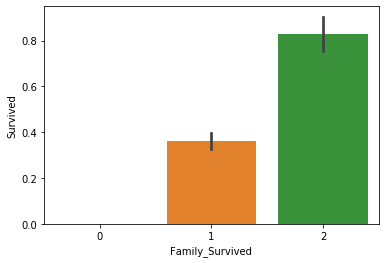

In [135]:
merged_df['Family_Survived'] = 1 
survived_id = merged_df.groupby('ID').Survived.sum()
for i in range(1, len(FamilyHasChild)+1):
    if survived_id[i] >= 1:
        merged_df.loc[merged_df.ID==i, ['Family_Survived']] = 2
    elif survived_id[i] == 0:
        merged_df.loc[merged_df.ID==i, ['Family_Survived']] = 0
sns.barplot(x='Family_Survived', y='Survived', data=merged_df)
plt.show()

# Feature Selection

4.1 We will use randomforrest regressor taught in week 5 to select most important features out of all the features

In [136]:
# split the data into training and testing
train = merged_df[: 891]
test = merged_df[891:]

In [137]:
features = ['Pclass', 'Sex', 'Parch', 'Embarked', 'Cabin_Given', 'Title', 'Age_Bin', 'Fare_Bin', 'Family_Survived']

In [138]:
train[features].head()

,Pclass,Sex,Parch,Embarked,Cabin_Given,Title,Age_Bin,Fare_Bin,Family_Survived
0,3,1,0,2,0,2,1,0,1
1,1,0,0,0,1,3,3,4,1
2,3,0,0,2,0,1,1,1,1
3,1,0,0,2,1,3,3,4,1
4,3,1,0,2,0,2,3,1,1


In [139]:
# select only relavent columns

X_train = train[features]
y_train = train['Survived']
X_test = test[features]

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
model = RandomForestRegressor()
model.fit(X_train, y_train)  

RandomForestRegressor()

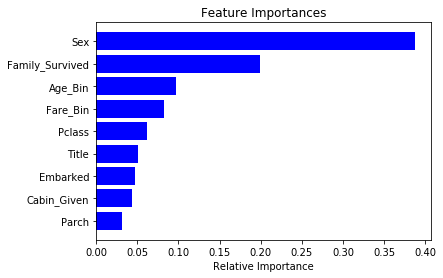

In [142]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

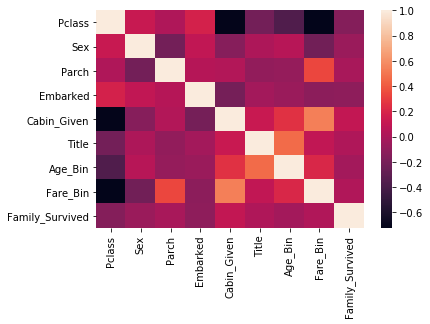

In [143]:
corr = merged_df[features].corr()

plt.figure()
# plot heatmap
sns.heatmap(corr)#gives colour on bais of values.
plt.show()

4.2 Using the feature importance plot from above we will be keeping the top 6 
important features to train the models further on.

In [144]:
best = ['Sex', 'Family_Survived','Fare_Bin', 'Pclass', 'Title' , 'Age_Bin']
X = train[best]
y = train['Survived']
test_X = test[best]

In [145]:
test[best]

,Sex,Family_Survived,Fare_Bin,Pclass,Title,Age_Bin
891,1,1,0,3,2,3
892,0,1,0,3,3,4
893,1,1,1,2,2,4
894,1,1,1,3,2,2
895,0,2,2,3,3,1
...,...,...,...,...,...,...
1304,1,1,1,3,2,2
1305,0,1,4,1,4,3
1306,1,1,0,3,2,3
1307,1,1,1,3,2,2


# Model training 

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [147]:
y_test.head()

709    1.0
439    0.0
840    0.0
720    1.0
39     1.0
Name: Survived, dtype: float64

5.1 <br>In this we will use Random Forest, SVM, and XGB to build the model.<br>
We will tune the model by choosing the best values for its hyperparameters using GridSearch

In [148]:
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve

In [149]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
prf = rf.predict(X_test)
print(" RF Accuracy: {}".format(metrics.accuracy_score(y_test, prf)*100))

 RF Accuracy: 86.66666666666667


In [150]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
psvc = svc.predict(X_test)
print(" SVC Accuracy: {}".format(metrics.accuracy_score(y_test, psvc)*100))

 SVC Accuracy: 85.55555555555556


In [151]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pxgb = xgb.predict(X_test)
print(" XGB Accuracy: {}".format(metrics.accuracy_score(y_test, pxgb)*100))

[23:05:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
 XGB Accuracy: 86.66666666666667


5.2 Hyperparameter Tuning 
<br> As random forest tends to overfit, i.e., perform well on training data, and poor on testing data
we will tune the model by choosing the best values for its hyperparameters using GridSearch

In [152]:
# RFC Parameters tunning 
rfc = RandomForestClassifier()
params = {"max_depth": [None],
              "max_features": [1, 3, 5],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "min_samples_split": [2, 3, 5 ,7],
              "min_samples_leaf": [5,7,9,10],
              "criterion": ["gini"]}


gs_rfc = GridSearchCV(rfc,param_grid = params, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
gs_rfc.fit(X_train,y_train)
print(gs_rfc.best_estimator_)
# Best score
print(gs_rfc.best_score_*100)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
RandomForestClassifier(bootstrap=False, max_features=3, min_samples_leaf=10)
84.89363354037266


 RF Accuracy: 84.44444444444444
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87        54
         1.0       0.81      0.81      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.84      0.84      0.84        90



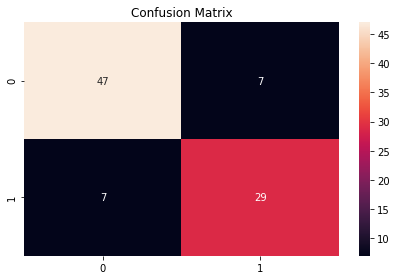

In [153]:
p1 = gs_rfc.predict(X_test)
print(" RF Accuracy: {}".format(metrics.accuracy_score(y_test, p1)*100))
print(classification_report(y_test,p1))
conf_matrix = confusion_matrix(y_test, p1)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

5.3 Now we will combine the predictions from all the models by creating final prediction that
will be the one that was most frequent in all the predictions. 

In [154]:
predictions = []
for p1, p2, p3 in zip(p1, psvc, pxgb):
    predictions.append(stats.mode([p1, p2, p3])[0][0])

   Accuracy: 85.55555555555556
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        54
         1.0       0.81      0.83      0.82        36

    accuracy                           0.86        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.86      0.86      0.86        90



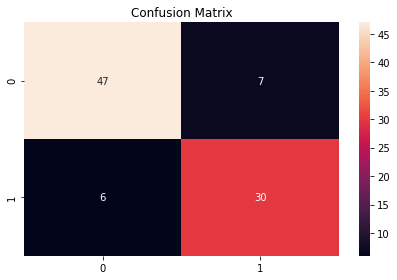

In [155]:
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, predictions)*100))
print(classification_report(y_test,predictions))
conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.tight_layout()

# Kaggle Submission

In [156]:
pred1 = gs_rfc.predict(test_X)
pred2 = svc.predict(test_X)
pred3 = xgb.predict(test_X)

In [157]:
final_predictions = []
for p1, p2, p3 in zip(pred1, pred2, pred3):
    final_predictions.append(stats.mode([p1, p2, p3])[0][0])

In [159]:
final_predictions = np.array(final_predictions)

In [160]:
res = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': final_predictions.astype(int)})
# save the predictions
res.to_csv('submission_test_final.csv', index=False)


<img src="kaggle Rank - titanic.png"/>